PENGELOMPOKAN SEGMENTASI PELANGGAN MENGGUNAKAN ALGORITMA K-MEANS

Dataset terdiri atas beberapa fitur mengenai data diri pelanggan pada saat pembuatan kartu member/keanggotaan. Adapun fitur tersebut adalah ID Pelanggan, usia, jenis kelamin, pendapatan tahunan, dan skor pengeluaran.

Kemudian,data ini akan diolah menggunakan algoritma k-means dengan tujuan untuk mengetahui pelanggan mana yang tepat sasaran atau dengan kata lain target customers. Jadi,data akan dikelompokkan menjadi beberapa cluster berdasarkan kesamaan fitur yang dimiliki.

MEMBACA FILE DALAM BENTUK CSV DAN MENYIMPANNYA DALAM VARIABEL DF

In [2]:
import pandas as pd
df=pd.read_csv('/content/Customer Segmentation Clustering With K_Means - in.csv')

MENAMPILKAN JUMLAH DATA DAN TYPE DATANYA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

MENAMPILKAN 5 BARIS TERATAS DALAM DATA FRAME

In [4]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


MENGETAHUI APAKAH ADA DATA YANG KOSNG

In [5]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

MENAMPILKAN FREKUENSI KEMUNCULAN NILAI DI KOLOM ORDERS DALAM BENTUK DIAGRAM BATANG

<Axes: >

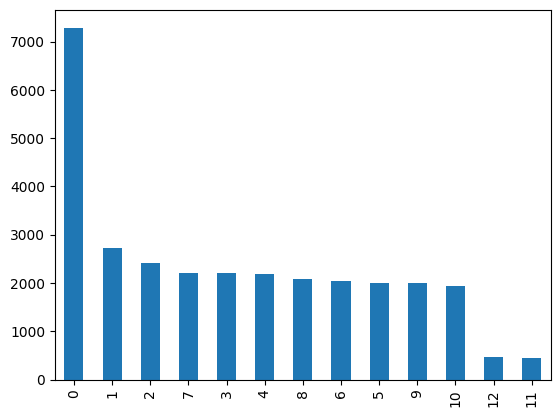

In [6]:
# Menghitung frekuensi kemunculan nilai dalam kolom 'Orders'
orders_counts = df['Orders'].value_counts()

# Memplot hasilnya
orders_counts.plot(kind='bar')

MENAMPILKAN FREKUENSI ATAU BANYAK DATA DI KOLOM GENDER,DIMANA DATA DIPISAHKAN ANTARA PEREMPUAN DAN LAKI-LAKI.

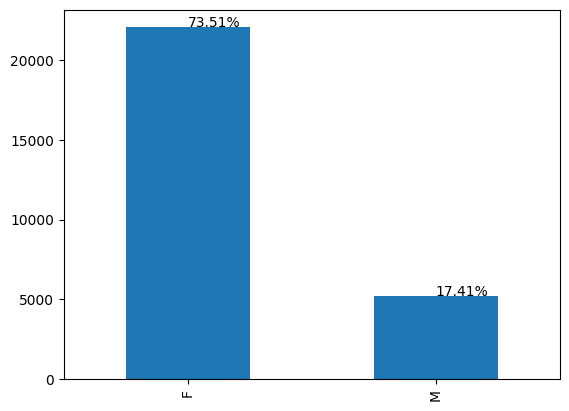

In [7]:
import matplotlib.pyplot as plt

# Menghitung frekuensi kemunculan nilai dalam kolom 'Gender'
gender_counts = df['Gender'].value_counts()

# Memplot hasilnya
gender_counts.plot(kind='bar')

# Menambahkan teks persentase di atas setiap batang
for i in range(len(gender_counts)):
    plt.text(x = i, y = gender_counts[i] + 40, s = str(round((gender_counts[i])*100/len(df['Gender']), 2)) + '%')

plt.show()

MENGETAHUI BANYAK DATA,NILAI UNIK DAN KATEGORI TERBANYAK DALAM KOLOM GENDER (OBJECT)

In [8]:
df.describe(include=object)

,Gender
count,27276
unique,2
top,F
freq,22054


MENERAPKAN TEKNI ONE-HOT ENCOING UNTUK MENGUBAH DATA KATEGORIK MENJADI NUMERIK DALAM KOLOM GENDER

In [9]:
df=pd.get_dummies(df,columns=['Gender'])

MENAMPILKAN DATA SETELAH TERJADI PERUBAHAN DIKOLOM GENDER

In [10]:
df.head()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,10,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


MEMBUAT DATA FRAME BARU

Perintah ini akan menghasilkan DataFrame baru yang disimpan dalam variabel features. DataFrame baru ini mengandung semua kolom dari DataFrame awal df, kecuali kolom 'Gender_M', 'Gender_F', dan 'Orders'.



In [11]:
features=df.drop(['Gender_M','Gender_F','Orders'],axis=1)
features

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MENAMPILKAN JUMLAH BARIS DAN JUMLAH KOLOM DARI DATA FRAME

In [12]:
features.shape

(30000, 36)

MENYAMAKAN SKALA ATAU NILAI UNTUK SETIAP VARIABEL MENGGUNAKAN STANDARDSCALER

In [13]:
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan penskalaan fitur pada data menggunakan fit_transform()
ss = scaler.fit_transform(features)

# Membuat DataFrame baru dari hasil penskalaan, dengan menggunakan nama kolom yang sesuai
df_scale = pd.DataFrame(ss, columns=features.columns)



MENAMPILKAN DATA SETELAH DILAKUKAN STANDARDSCALER

In [14]:
df_scale

,Cust_ID,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-1.731993,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-1.731878,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-1.731647,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29996,1.731647,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29997,1.731762,-0.332312,1.059984,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,1.621530,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
29998,1.731878,-0.332312,-0.357739,-0.242985,-0.218010,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775


MENGETAHUI JUMLAH CLUSTER TERBAIK MENGGUNAKAN SILHOUETTE_SCORE

Perintah ini digunakan untuk menghitung dan mencetak skor Silhouette untuk berbagai nilai jumlah cluster (K) yang berbeda dalam algoritma KMeans. Skor Silhouette digunakan untuk mengevaluasi seberapa baik pengelompokan telah dilakukan, di mana nilai yang lebih tinggi menunjukkan bahwa titik-titik dalam satu klaster berdekatan satu sama lain dan terpisah dari klaster lainnya.



In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#list of diff value of k

n_cluster=[4,5,6,7,8]


# use of for loop


for K in n_cluster:
    cluster=KMeans(n_clusters=K,random_state=10)
    predict=cluster.fit_predict(df_scale)
    score=silhouette_score(df_scale,predict,random_state=10)
    print(f'for n_clusters {K} , silhouette_score is {score}')

for n_clusters 4 , silhouette_score is 0.2609059785654815
for n_clusters 5 , silhouette_score is 0.2567784383335677
for n_clusters 6 , silhouette_score is 0.24388495300244856
for n_clusters 7 , silhouette_score is 0.1358066984722081
for n_clusters 8 , silhouette_score is 0.19179095202052512


MEMBUAT MODEL KMEANS DENGAN MENGGUNAKAN JUMLAH KLUSTER YANG TEAH DITENTUKAN YAKNI 4


In [16]:
model=KMeans(n_clusters=4,random_state=10)
model.fit(df_scale)

KMeans(n_clusters=4, random_state=10)

MENAMBAHKAN KOLOM BARU BERNAMA CLUSTER YANG BERISI LABEL KLUSTER YANG TELAH DIPREDIKSI MENGGUNAKAN MODEL SEBELUMNYA.

In [17]:
df_cluster=df.copy(deep=True)
df_cluster['Cluster']=model.labels_

MENAMPILKAN DATA SETELAH DILAKUKAN PEMODELAN

In [18]:
df_cluster

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,1,1
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
2,3,7,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,5,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29996,29997,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
29997,29998,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
29998,29999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


MENGETAHUI JUMLAH DATA UNTUK SETIAP CLUSTER/KELOMPOKNYA

In [19]:
df_cluster['Cluster'].unique()

array([1, 2, 0, 3], dtype=int32)

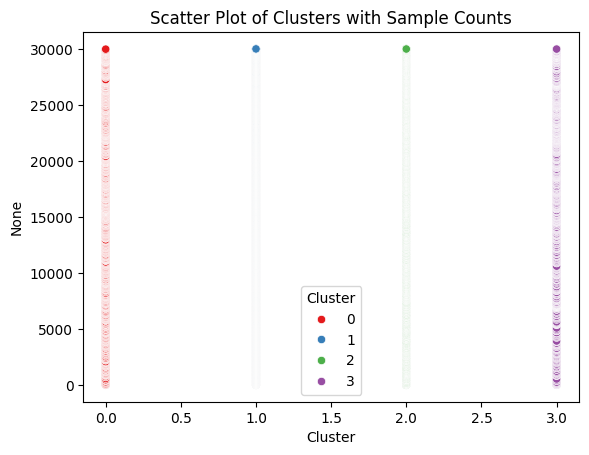

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat scatter plot
sns.scatterplot(data=df_cluster, x='Cluster', y=df_cluster.index, hue='Cluster', palette='Set1')

# Menambahkan judul plot
plt.title('Scatter Plot of Clusters with Sample Counts')

# Menampilkan plot
plt.show()
